In [1]:
import numpy as np
import lab1.method.gradient_descent as gd
import lab1.method.dichotomy_gradient as dg
import lab1.plot.plotter as plotter
import lab1.method.func_generation as fg
import lab1.method.wolfe_gradient as wg

In [2]:
def multiply(x, m, n):
    v = np.zeros(n, dtype=object)
    for i in range(n):
        for j in range(n):
            v[i] += x[j] * m[j][i]
    res = 0
    for i in range(n):
        res += v[i] * x[i]
    return res


def f(n):
    return lambda x: np.matmul(np.matmul(x, matrix), x.T)


def grad_calculator(x, func, n):
    h = 1e-5
    res = []
    for i in range(n):
        delta = np.zeros(n)
        delta[i] = h
        res.append((func(x + delta) - func(x - delta)) / (2 * h))
    return np.asarray(res)

def grad(func, n):
    return lambda x : grad_calculator(x, func, n)
    #h = 1e-5
    #return lambda x: (func(x[:, np.newaxis] + h * np.eye(n)) - func(x[:, np.newaxis] - h * np.eye(n))) / (2 * h)

n: 5, k: 10
ne wolfe: 1.9560951638348642e-07
n: 5, k: 10
ne wolfe: 1.198932186405776e-07
n: 5, k: 10
ne wolfe: 1.6875494428013663e-07
n: 5, k: 10
ne wolfe: 1.787987422406953e-08
n: 5, k: 10
ne wolfe: 1.7685122187972596e-07
n: 5, k: 10
ne wolfe: 1.552961282380318e-07
n: 5, k: 10
ne wolfe: 1.1660944977615963e-08
n: 5, k: 10
ne wolfe: 1.7308384343212323e-07
n: 5, k: 10
ne wolfe: 1.9549402158506878e-07
n: 5, k: 10
ne wolfe: 1.267706898972544e-07
n: 5, k: 10
ne wolfe: 1.682216424925036e-07
n: 5, k: 10
ne wolfe: 1.8700270590874685e-07
n: 5, k: 10
ne wolfe: 1.2377144209085595e-07
n: 5, k: 10
ne wolfe: 1.8554728664997864e-07
n: 5, k: 10
ne wolfe: 1.7721854849051495e-07
n: 5, k: 10
ne wolfe: 1.4235816263283757e-07
n: 5, k: 10
ne wolfe: 1.552579161191601e-07
n: 5, k: 10
ne wolfe: 1.9993022216458905e-08
n: 5, k: 10
ne wolfe: 1.4008589970006204e-07
n: 5, k: 10
ne wolfe: 1.9167951930122404e-07
n: 5, k: 10
ne wolfe: 1.410259848927169e-08
n: 5, k: 10
ne wolfe: 1.550755040052002e-07
n: 5, k: 10
ne wol

<module 'matplotlib.pyplot' from 'C:\\Users\\awishy\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

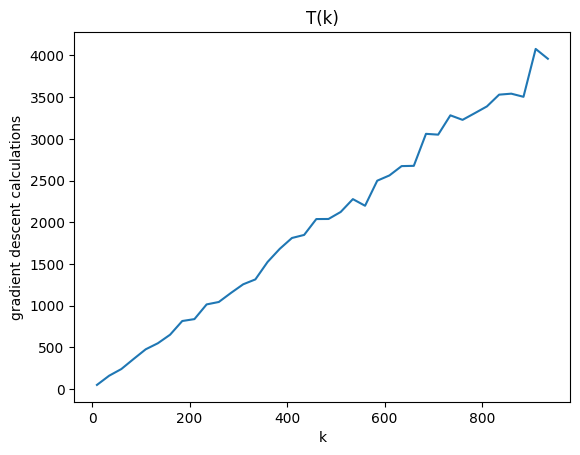

In [29]:
dependency = []
x = []
y = []
x.clear()
y.clear()
n = 5
count = 30
ysum = 0
lr = 0.1
for k in range(10, 950, 25):
    for _ in range(count):
        start = np.ones(n)
        matrix = fg.generate_func(n, k)
        while True:
            points1, l, _ = gd.gradient_descent(f(n), grad(f(n), n), start, 1e-3, lr, 10000)
            if f(n)(points1[-1]) > 0.1:
                lr /= 2
            else:
                break
        print("n: {}, k: {}".format(n, k))
        print("ne wolfe:", f(n)(points1[-1]))
        ysum = ysum + l
        lr *= 50
    x.append(k)
    y.append(ysum / count)
    ysum = 0
plotter.plot_by_two_coordinates(x, y, "k")


In [30]:
x.clear()
y.clear()
k = 10
count = 10
ysum = 0
for n in range(10, 950, 50):
    for _ in range(count):
        start = np.ones(n)
        matrix = fg.generate_func(n, k)
        points1, l, _ = gd.gradient_descent(f(n), grad(f(n), n), start, 1e-2, 0.05)
        print("n: {}, k: {}".format(n, k))
        print("ne wolfe:", f(n)(points1[-1]))
        print("l:", l)
        ysum = ysum + l
    x.append(n)
    y.append(ysum / count)
    ysum = 0
plotter.plot_by_two_coordinates(x, y, "n", True)


n: 10, k: 10
ne wolfe: 1.8432486849440183e-05
l: 34
n: 10, k: 10
ne wolfe: 1.6627560569878336e-05
l: 38
n: 10, k: 10
ne wolfe: 1.5030109831753164e-05
l: 42
n: 10, k: 10
ne wolfe: 1.8692708642478587e-05
l: 31
n: 10, k: 10
ne wolfe: 1.7050400179404104e-05
l: 43
n: 10, k: 10
ne wolfe: 1.5619125774420143e-05
l: 41
n: 10, k: 10
ne wolfe: 2.018905208701144e-05
l: 34
n: 10, k: 10
ne wolfe: 1.1216339174929064e-05
l: 41
n: 10, k: 10
ne wolfe: 1.794990777585381e-05
l: 39
n: 10, k: 10
ne wolfe: 1.9186571332224707e-05
l: 26
n: 60, k: 10
ne wolfe: 1.4538999033335471e-05
l: 40
n: 60, k: 10
ne wolfe: 1.6578444955611662e-05
l: 46
n: 60, k: 10
ne wolfe: 1.1983242598540642e-05
l: 37
n: 60, k: 10
ne wolfe: 1.5136793592661795e-05
l: 30
n: 60, k: 10
ne wolfe: 1.5242156964403646e-05
l: 38
n: 60, k: 10
ne wolfe: 1.4912105845041193e-05
l: 32
n: 60, k: 10
ne wolfe: 1.278258662674696e-05
l: 47
n: 60, k: 10
ne wolfe: 1.9542814347894043e-05
l: 34
n: 60, k: 10
ne wolfe: 1.532810504890425e-05
l: 36
n: 60, k: 10
ne 